In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.exponential_regression import ExponentialRegression
from src.loss import Chi2Loss

from sklearn.preprocessing import StandardScaler

from tqdm import tqdm

# Non-exponential data

$f(t) = 2 + 3t + 4t^2 + 5t^3$

In [2]:
measurements_amount = 100

t = np.linspace(-2, 1, measurements_amount).reshape(-1, 1)
target = (2 + 3*t + 4*t**2 + 5*t**3).ravel()

In [3]:
scaler = StandardScaler()
t_scaled = scaler.fit_transform(t)

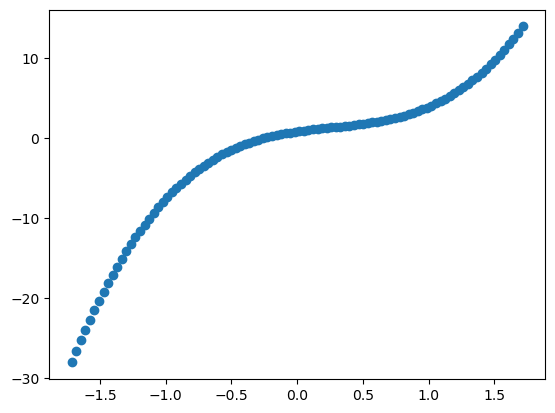

In [4]:
plt.scatter(t_scaled, target)

In [5]:
loss = Chi2Loss(measurements_amount)
init_lambda = np.array([-1., -1.])
init_omega = np.array([1., -1.])
model = ExponentialRegression(n_terms=2, loss_function=loss, 
                              initial_lambda=init_lambda, initial_omega=init_omega)
model.fit(t_scaled, target)

ExponentialRegression(initial_lambda=array([-1., -1.]),
                      initial_omega=array([ 1., -1.]), loss_function=Chi2Loss,
                      n_terms=2)

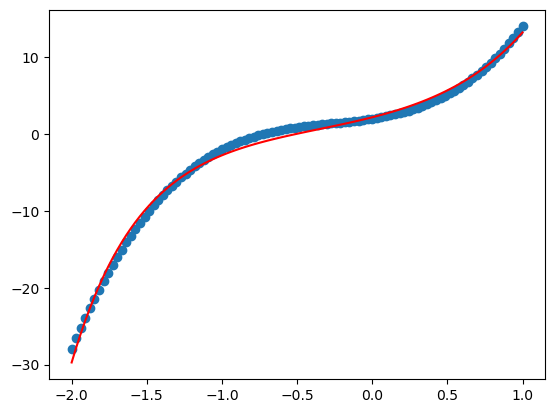

In [6]:
plt.scatter(t, target)
plt.plot(t, model.predict(t_scaled), color='red')

$f(t) = sin(t)$

In [7]:
measurements_amount = 100

t = np.linspace(-2, 1, measurements_amount).reshape(-1, 1)
target = np.sin(t).ravel()

In [8]:
scaler = StandardScaler()
t_scaled = scaler.fit_transform(t)

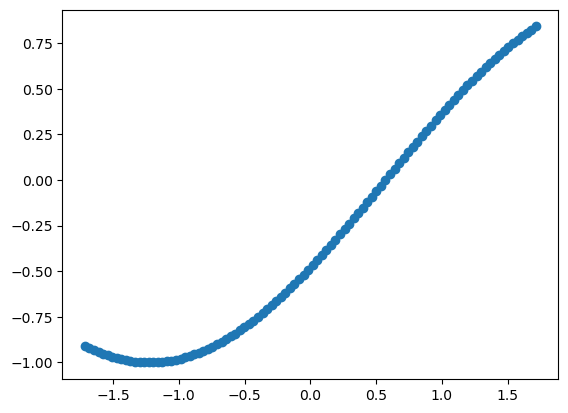

In [9]:
plt.scatter(t_scaled, target)

In [10]:
param_range = np.linspace(-2, 2, 100)
loss = Chi2Loss(measurements_amount)
tries_amount = 1000
best_loss = np.inf
best_model = None
n_terms = 3

for _ in tqdm(range(tries_amount)):
    init_lambda = np.random.choice(param_range, n_terms)
    init_omega = np.random.choice(param_range, n_terms)
    model = ExponentialRegression(n_terms=n_terms, loss_function=loss, 
                                  initial_lambda=init_lambda, initial_omega=init_omega)
    model.fit(t_scaled, target)
    if model.loss_ < best_loss:
        best_loss = model.loss_
        best_model = model


 32%|███▏      | 320/1000 [00:00<00:01, 480.15it/s]/home/neepaw/CodeProjects/Pycharm/ExponentialRegression/src/loss/chi2_loss.py:19: RuntimeWarning: overflow encountered in matmul
  return np.float_(residuals.T @ self._weights @ residuals)
100%|██████████| 1000/1000 [00:02<00:00, 428.24it/s]


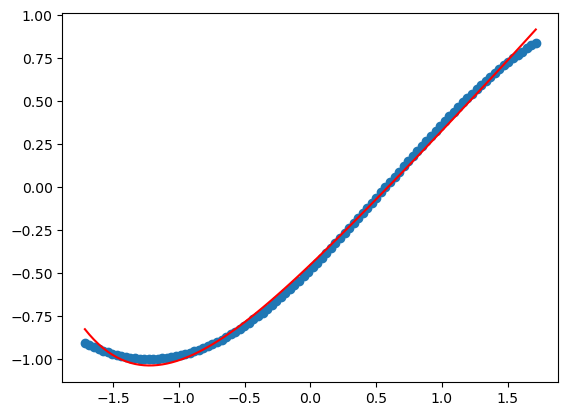

In [11]:
plt.scatter(t_scaled, target)
plt.plot(t_scaled, best_model.predict(t_scaled), color='red')

$f(t) = exp(-x^2)$

In [12]:
t = np.linspace(-3, 3, measurements_amount).reshape(-1, 1)
target = np.exp(-t**2).ravel()

In [13]:
scaler = StandardScaler()
t_scaled = scaler.fit_transform(t)

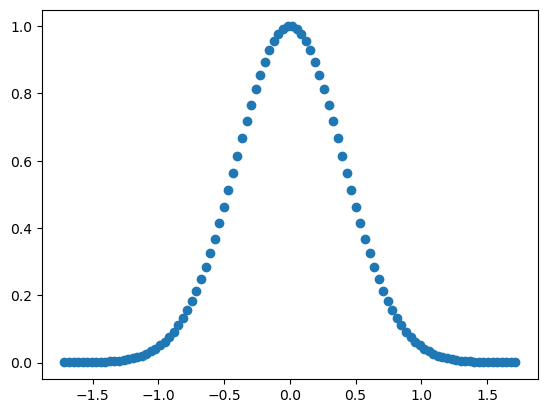

In [14]:
plt.scatter(t_scaled, target)

In [16]:
param_range = np.linspace(-10, 10, 1000)
loss = Chi2Loss(measurements_amount)
tries_amount = 1_000
best_loss = np.inf
best_model = None
n_terms = 10

for _ in tqdm(range(tries_amount)):
    init_lambda = np.random.choice(param_range, n_terms)
    init_omega = np.random.choice(param_range, n_terms)
    model = ExponentialRegression(n_terms=n_terms, loss_function=loss, 
                                  initial_lambda=init_lambda, initial_omega=init_omega)
    model.fit(t_scaled, target)
    if model.loss_ < best_loss:
        best_loss = model.loss_
        best_model = model

 13%|█▎        | 133/1000 [00:01<00:09, 90.37it/s] 

Failed to converge after 1000 iterations


/home/neepaw/CodeProjects/Pycharm/ExponentialRegression/src/loss/chi2_loss.py:19: RuntimeWarning: overflow encountered in matmul
  return np.float_(residuals.T @ self._weights @ residuals)
 24%|██▎       | 235/1000 [00:02<00:06, 117.41it/s]

Failed to converge after 1000 iterations


 27%|██▋       | 271/1000 [00:02<00:05, 125.84it/s]

Failed to converge after 1000 iterations


/home/neepaw/CodeProjects/Pycharm/ExponentialRegression/src/exponential_regression.py:155: RuntimeWarning: overflow encountered in exp
  exp_terms = np.exp(np.outer(t, omega_))
/home/neepaw/CodeProjects/Pycharm/ExponentialRegression/src/exponential_regression.py:156: RuntimeWarning: overflow encountered in matmul
  return exp_terms @ lambda_
/home/neepaw/CodeProjects/Pycharm/ExponentialRegression/src/loss/chi2_loss.py:19: RuntimeWarning: invalid value encountered in matmul
  return np.float_(residuals.T @ self._weights @ residuals)
 34%|███▍      | 345/1000 [00:03<00:05, 127.42it/s]

Failed to converge after 1000 iterations


 42%|████▏     | 416/1000 [00:03<00:03, 157.52it/s]/home/neepaw/CodeProjects/Pycharm/ExponentialRegression/src/loss/chi2_loss.py:19: RuntimeWarning: overflow encountered in matmul
  return np.float_(residuals.T @ self._weights @ residuals)
/home/neepaw/CodeProjects/Pycharm/ExponentialRegression/src/exponential_regression.py:155: RuntimeWarning: overflow encountered in exp
  exp_terms = np.exp(np.outer(t, omega_))
/home/neepaw/CodeProjects/Pycharm/ExponentialRegression/src/exponential_regression.py:156: RuntimeWarning: overflow encountered in matmul
  return exp_terms @ lambda_
/home/neepaw/CodeProjects/Pycharm/ExponentialRegression/src/loss/chi2_loss.py:19: RuntimeWarning: invalid value encountered in matmul
  return np.float_(residuals.T @ self._weights @ residuals)
 48%|████▊     | 483/1000 [00:04<00:04, 122.85it/s]

Failed to converge after 1000 iterations


/home/neepaw/CodeProjects/Pycharm/ExponentialRegression/src/exponential_regression.py:155: RuntimeWarning: overflow encountered in exp
  exp_terms = np.exp(np.outer(t, omega_))
/home/neepaw/CodeProjects/Pycharm/ExponentialRegression/src/exponential_regression.py:156: RuntimeWarning: overflow encountered in matmul
  return exp_terms @ lambda_
/home/neepaw/CodeProjects/Pycharm/ExponentialRegression/src/loss/chi2_loss.py:19: RuntimeWarning: invalid value encountered in matmul
  return np.float_(residuals.T @ self._weights @ residuals)
 59%|█████▉    | 593/1000 [00:05<00:04, 86.01it/s] 

Failed to converge after 1000 iterations
Failed to converge after 1000 iterations


 69%|██████▉   | 689/1000 [00:05<00:02, 127.87it/s]

Failed to converge after 1000 iterations


 79%|███████▉  | 789/1000 [00:06<00:01, 128.09it/s]

Failed to converge after 1000 iterations


 83%|████████▎ | 829/1000 [00:07<00:01, 94.27it/s] 

Failed to converge after 1000 iterations


 84%|████████▍ | 844/1000 [00:07<00:01, 106.46it/s]/home/neepaw/CodeProjects/Pycharm/ExponentialRegression/src/loss/chi2_loss.py:19: RuntimeWarning: overflow encountered in matmul
  return np.float_(residuals.T @ self._weights @ residuals)
 87%|████████▋ | 872/1000 [00:07<00:01, 102.07it/s]

Failed to converge after 1000 iterations


 91%|█████████ | 912/1000 [00:07<00:00, 94.05it/s] 

Failed to converge after 1000 iterations


100%|██████████| 1000/1000 [00:08<00:00, 114.10it/s]


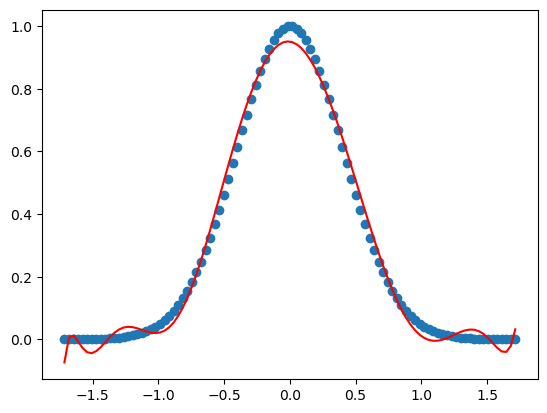

In [17]:
plt.scatter(t_scaled, target)
plt.plot(t_scaled, best_model.predict(t_scaled), color='red')